In [5]:
# libraries 
import pandas as pd
%pip install -q plotnine
from plotnine import *


In [28]:
# loading data C:\Users\HelenSepman\OneDrive - Kruvelab\Documents\GitHub\ML_calibration_graph_linearity\data
file_path = "C:/Users/HelenSepman/OneDrive - Kruvelab/Documents/GitHub/ML_calibration_graph_linearity/data/data_ready_231029.csv"
df_calibrations = pd.read_csv(file_path)
df_calibrations_lab1 = df_calibrations[df_calibrations['lab']=='L1']
#df_calibrations_lab1 = df_calibrations_lab1[df_calibrations_lab1['compound'].isin(["Amitrole", "Vancomycin_H2"])]

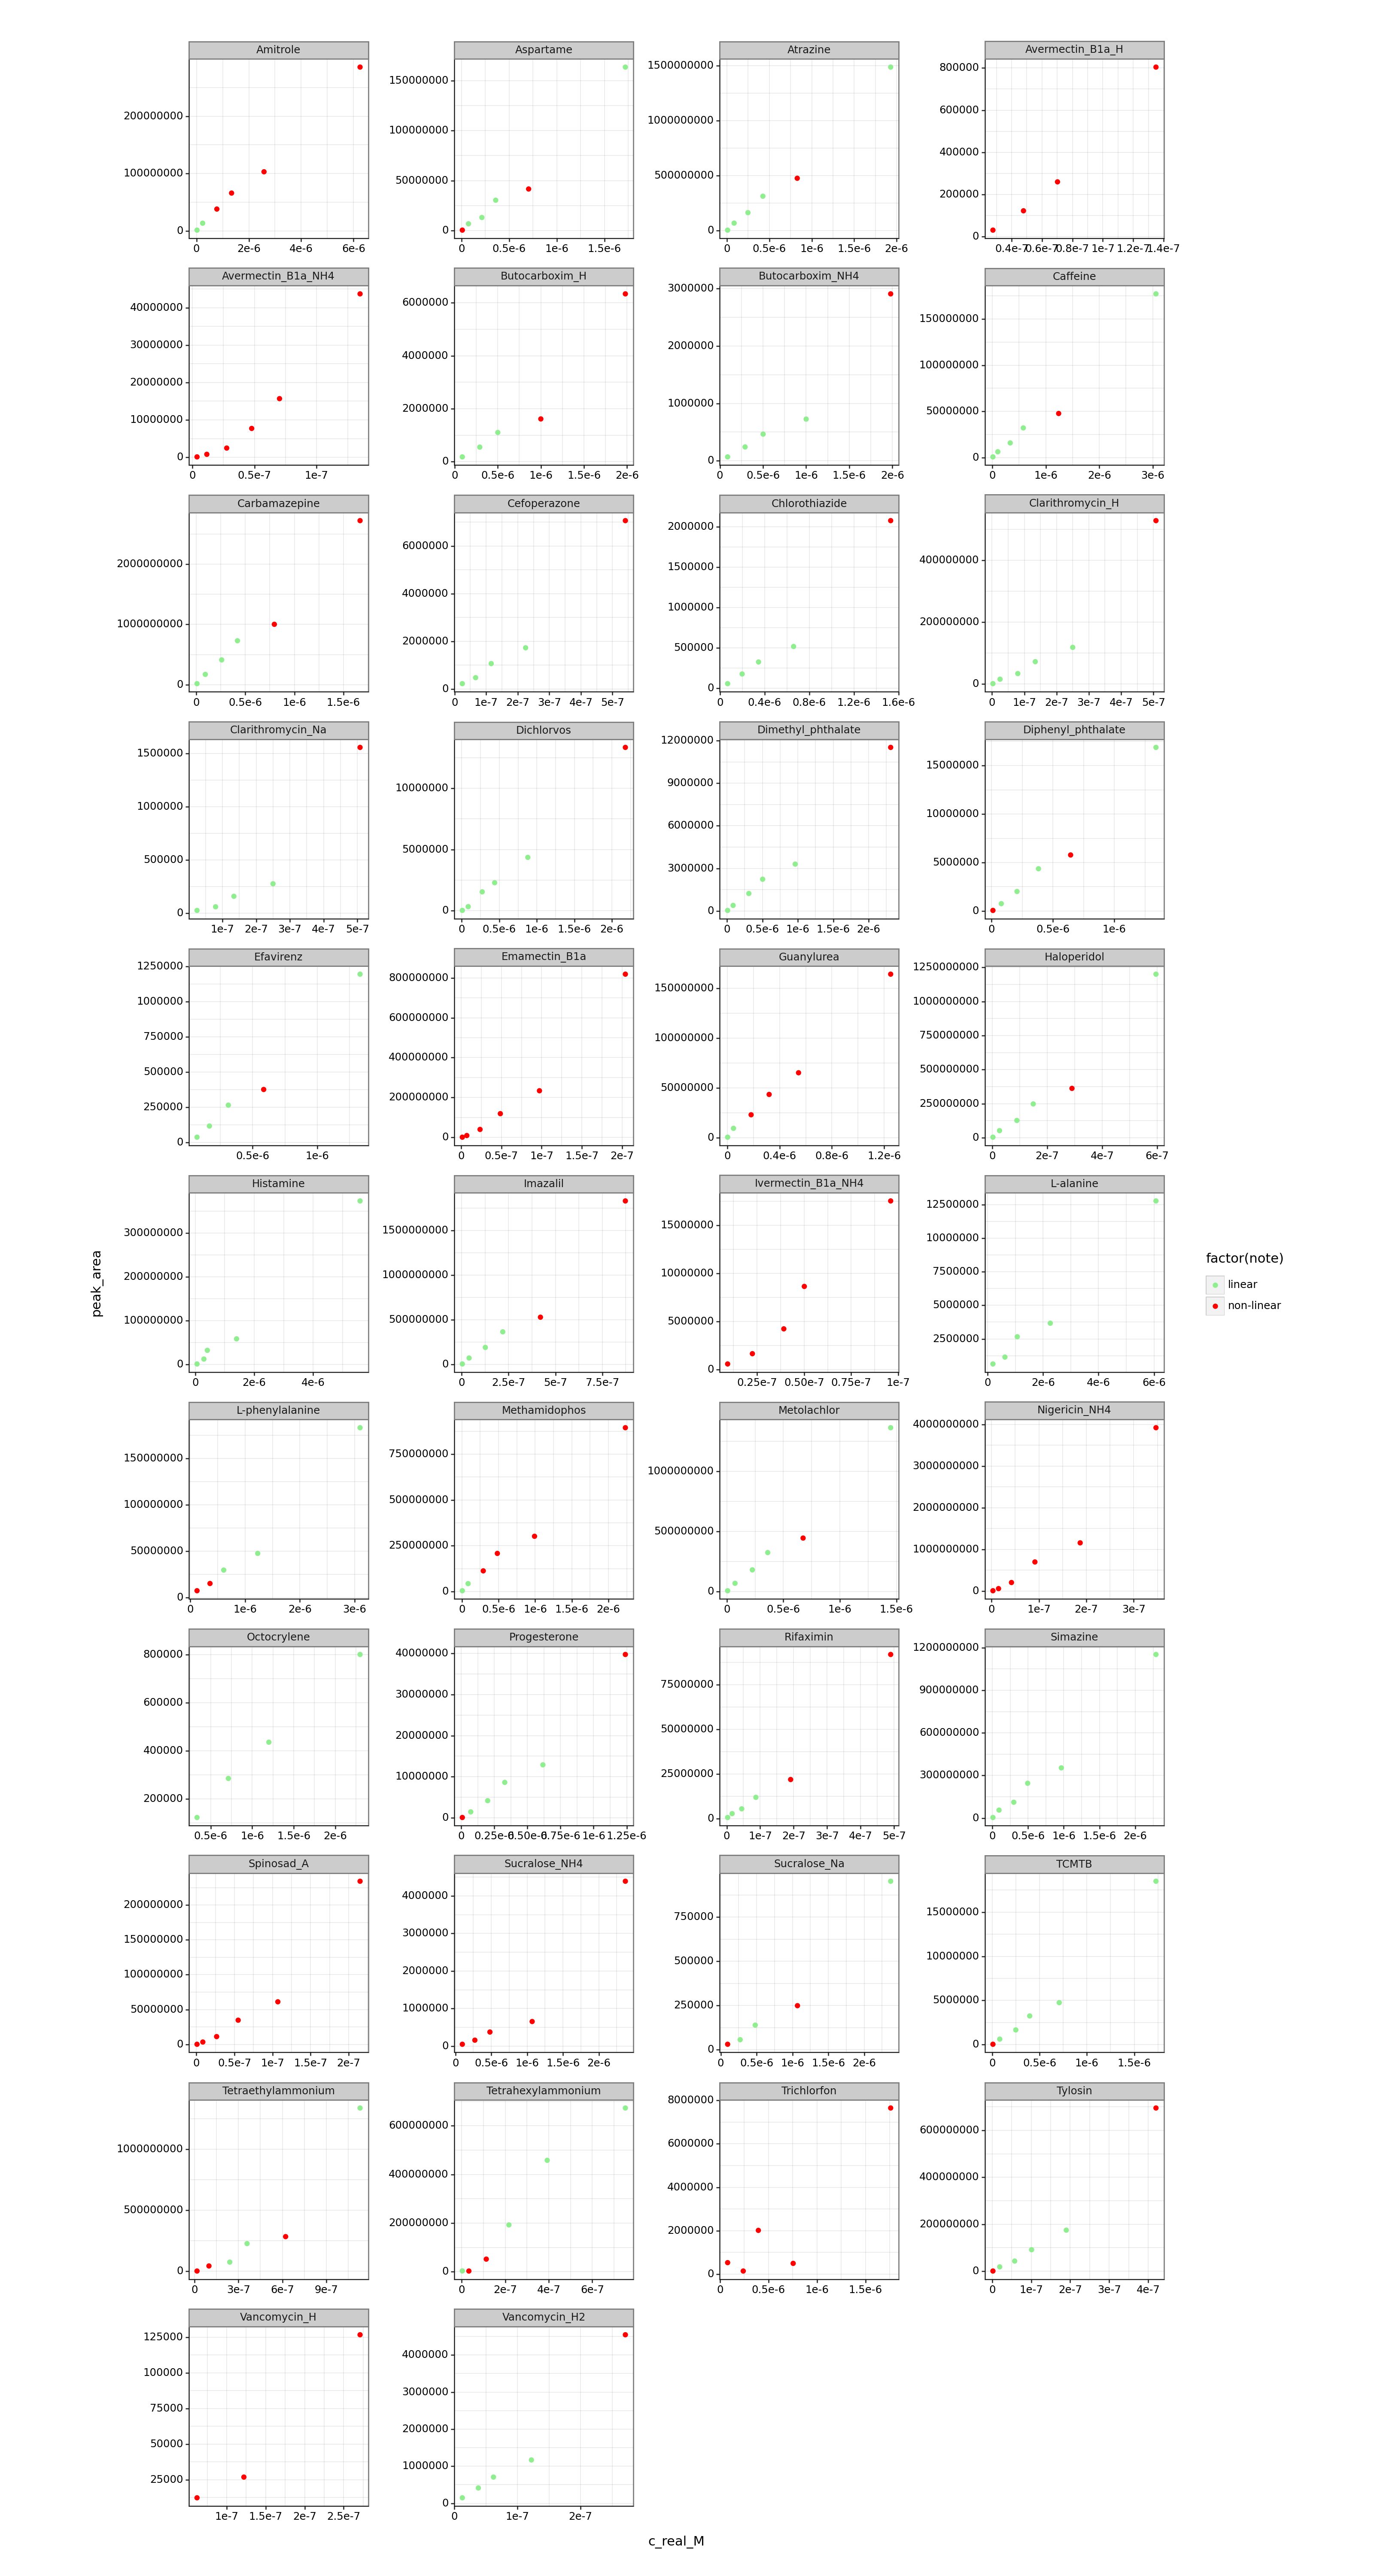

<Figure Size: (1600 x 3000)>

In [39]:
fig = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig

#### Notes from calibration graphs
* Some points might be super difficult to classify
* scaling is needed
* can one of the additional confirmational parameters be "if we fit a line through "linear" points, the average residuals for non-linear and linear points are different by X; for linear the average residual is less than y" etc?

#### Potential solutions to try to classify linear and non-linear points
* CNN pattern recognition? Would we need to transfer this data to a AxA grid matrix for all?

#### Final objective
Extract slope for the calibration graph points within linear range
As no ML algorithm is 100% accurate, we could give lower weights to the "non-linear" classified datapoints when fitting linear regression.

c:\anaconda3\Lib\site-packages\mizani\breaks.py:251: RuntimeWarning: overflow encountered in scalar multiply
c:\anaconda3\Lib\site-packages\mizani\breaks.py:251: RuntimeWarning: overflow encountered in scalar multiply
c:\anaconda3\Lib\site-packages\mizani\breaks.py:251: RuntimeWarning: overflow encountered in scalar multiply
c:\anaconda3\Lib\site-packages\mizani\breaks.py:251: RuntimeWarning: overflow encountered in scalar multiply
c:\anaconda3\Lib\site-packages\mizani\breaks.py:251: RuntimeWarning: overflow encountered in scalar multiply


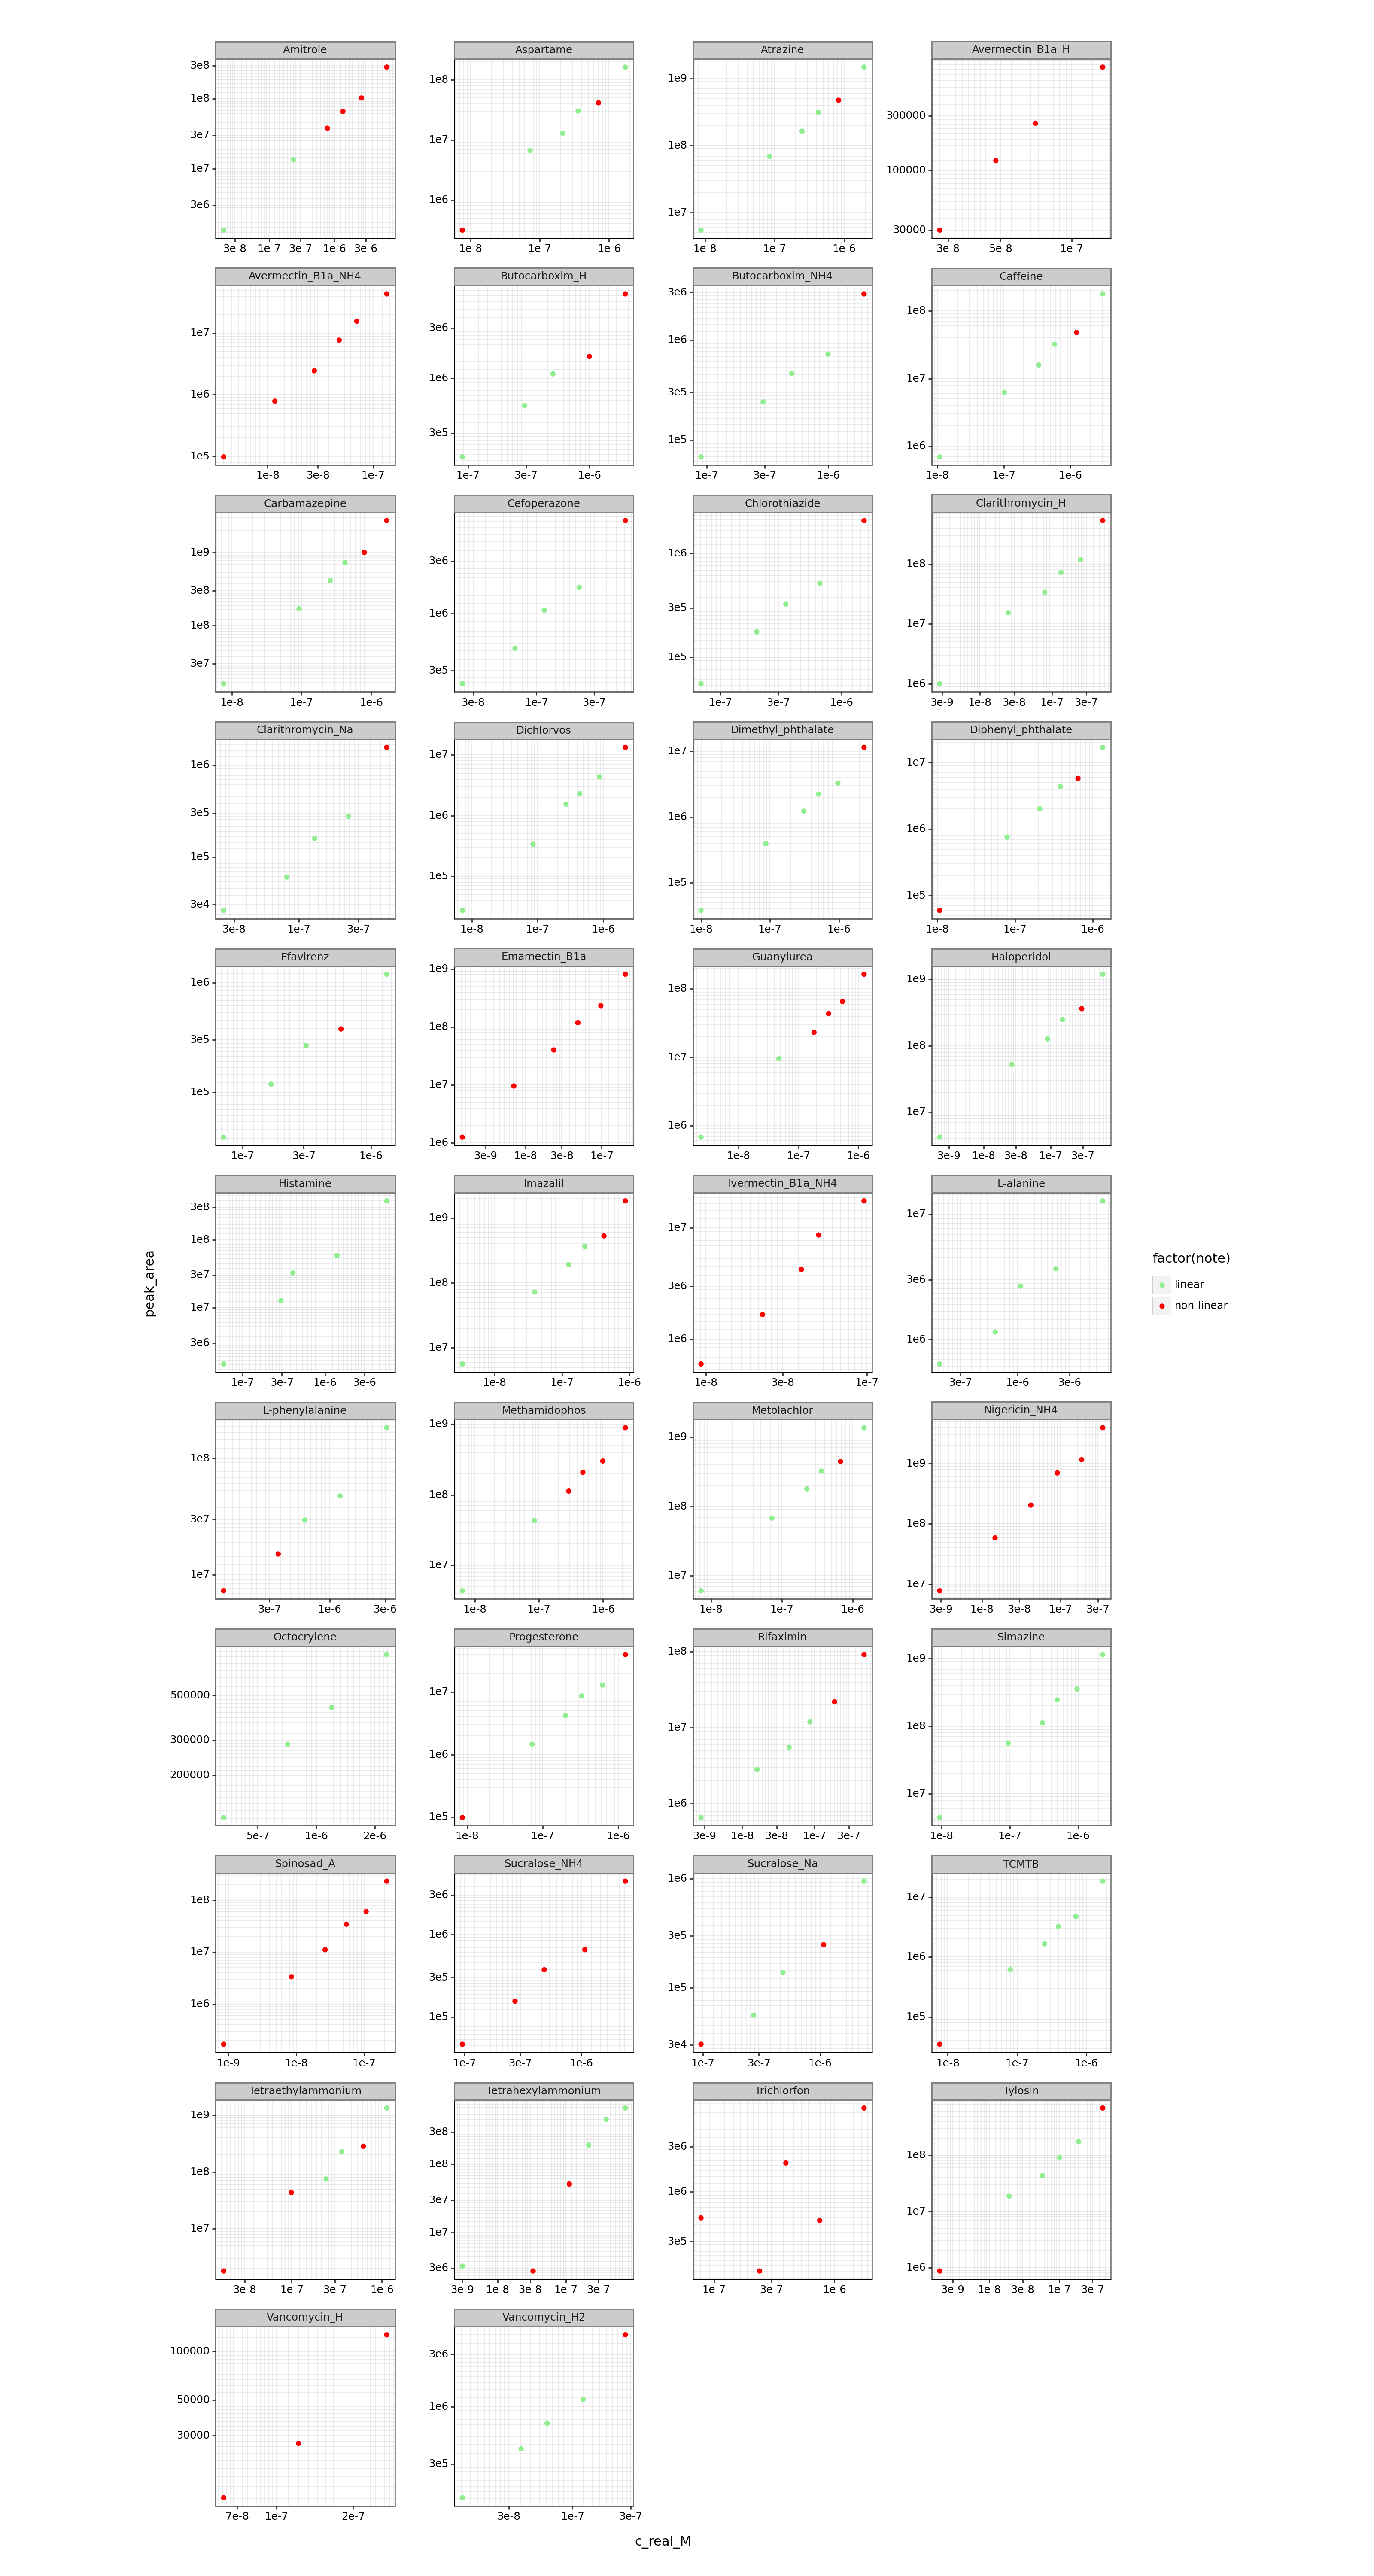

<Figure Size: (1600 x 3000)>

In [47]:
# same plot but log scale x and y
fig_log = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    scale_y_log10() +
    scale_x_log10() +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_log